<a href="https://colab.research.google.com/github/mikeornstein/lets-meet-halfway/blob/main/lets_meet_halfway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# !pip install descartes
# !pip install openrouteservice


In [28]:
import requests
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, mapping, GeometryCollection, LineString
from descartes import PolygonPatch
from google.colab import userdata

# Define your API key for Open Route Service
API_KEY = userdata.get('secretORS')

# Define function to make request to Open Route Service API and get isochrone
def get_isochrone(location, range_values):
    url = f"https://api.openrouteservice.org/v2/isochrones/driving-car"
    headers = {"Authorization": f"Bearer {API_KEY}"}
    params = {
        "locations": [location],
        "range": range_values,
        "interval": 600,
        "units": "m",
    }
    response = requests.post(url, json=params, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.text)
        return None

# Define function to plot isochrone
def plot_isochrone(location, isochrone):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()

    for feature in isochrone['features']:
        polygon = Polygon(feature['geometry']['coordinates'][0])
        patch = PolygonPatch(polygon, edgecolor='blue', facecolor='blue', alpha=0.3)
        ax.add_patch(patch)

    ax.set_aspect('equal')
    plt.title(f'Isochrone around {location}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

def get_lat_lon_from_zip(zip_code):
    url = f"https://api.openrouteservice.org/geocode/search?API_KEY={API_KEY}&text={zip_code}"
    headers = {"Accept": "application/json"}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        if data["features"]:
            lat = data["features"][0]["geometry"]["coordinates"][1]
            lon = data["features"][0]["geometry"]["coordinates"][0]
            return lat, lon
        else:
            print("No results found for the provided ZIP code.")
            return None
    else:
        print("Error:", response.text)
        return None

In [14]:
# Define your locations
zip_codes = [90232, 90640]
zip_codes = [str(zip_code) for zip_code in zip_codes]
locations = []
isochrones =[]
range_values = [300, 600, 900]  # for example, 5, 10, and 15 minutes

for zip_code in zip_codes:
  location = get_lat_lon_from_zip(zip_code)
  print(location)
  locations.append(location)
  isochrone = get_isochrone(location, range_values)
  isochrones.append(isochrone)
  plot_isochrone(f"{zip_code}, {location}:.3f", isochrone)

# Define the range values for isochrones (in seconds)



Error: {
    "error": "Authorization field missing"
}
None


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [20]:
import openrouteservice
from openrouteservice.directions import directions
from openrouteservice import convert

coords = ((8.34234,48.23424),(8.34423,48.26424))

client = openrouteservice.Client(key=API_KEY) # Specify your personal API key
routes = directions(client, coords) # Now it shows you all arguments for .directions

In [21]:

coords = ((8.34234,48.23424),(8.34423,48.26424))\

# decode_polyline needs the geometry only
geometry = client.directions(coords)['routes'][0]['geometry']

decoded = convert.decode_polyline(geometry)

print(decoded)

{'type': 'LineString', 'coordinates': [[8.34427, 48.23383], [8.34415, 48.23351], [8.34395, 48.23314], [8.34385, 48.23305], [8.34332, 48.23274], [8.3431, 48.23247], [8.34286, 48.23231], [8.34271, 48.23224], [8.34233, 48.23216], [8.34184, 48.23203], [8.34171, 48.23195], [8.34052, 48.23236], [8.34036, 48.23243], [8.33994, 48.23281], [8.33942, 48.23321], [8.33926, 48.23347], [8.33922, 48.23359], [8.33922, 48.23372], [8.33941, 48.23434], [8.33941, 48.23448], [8.33935, 48.2346], [8.33925, 48.23472], [8.33898, 48.23493], [8.33882, 48.23502], [8.33849, 48.23517], [8.33839, 48.23526], [8.33832, 48.23537], [8.33823, 48.23577], [8.33818, 48.23589], [8.33811, 48.23597], [8.3379, 48.23612], [8.33725, 48.23651], [8.33706, 48.23667], [8.33671, 48.23707], [8.33613, 48.23777], [8.33603, 48.23795], [8.33598, 48.23812], [8.33596, 48.23821], [8.33597, 48.23882], [8.33592, 48.23924], [8.33588, 48.23938], [8.33583, 48.2395], [8.33572, 48.23964], [8.3354, 48.23997], [8.33518, 48.2403], [8.33512, 48.24044], [

In [116]:
import folium

# Create a map centered at a specific location
collection = GeometryCollection(LineString(decoded['coordinates']))
center = collection.centroid
m = None
m = folium.Map(location=(center.y,center.x), zoom_start=14,
)

# Add a marker at a specific location
folium.GeoJson(decoded).add_to(m)
envelope = LineString(decoded['coordinates']).envelope
corner1 = max(list(envelope.exterior.coords))
corner2 = min(list(envelope.exterior.coords))
# m.fit_bounds([corner2, corner1])

# Display the map
m

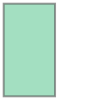

In [92]:
envelope

(8.32772, 48.23195)